---
title: pydotplus安装和基本入门
date: 2018-09-21 20:17:55
tags: [pydotplus]
toc: true
xiongzhang: false

---
<span></span>
<!-- more -->


本文代码运行环境:

- windows10
- python3.6
- jupyter notebook

### 下载Graphviz

pydotplus依赖Graphviz这个绘图库, 它是c开发的, 所以在安装pydotplus之前, 需要首先安装Graphviz, 不过不管哪个系统, 它都有编译好的二进制包, 可以直接安装。以windows为例, 我们首先需要现在Graphviz安装包: [点此下载](http://www.graphviz.org/download/).

然后找到`Stable 2.38 Windows install packages`, 这是稳定版的, 点击进入以后, 下载`graphviz-2.38.msi`即可。文件大概由34M。

### 安装Graphviz

安装过程很简单, 只要双击安装包, 一路下一步就行了。

<img src="imgs/install-graphviz.png" class="img-thumbnail"/>

### 配置环境变量

pydotplus实际上是在命令行调用Graphviz, 所以要想python能找到graphviz的安装路径, 必须配置环境变量。

通常, graphviz默认安装在这个路径: `C:\Program Files (x86)\Graphviz2.38`

我们需要将两个路径添加到环境变量中:

- `C:\Program Files (x86)\Graphviz2.38`
- `C:\Program Files (x86)\Graphviz2.38\bin`

<img src="imgs/path.png" class="img-thumbnail">

### 安装pydotplus

pydotplus是python模块, 它的安装和安装普通的模块一样, 就是使用`pip`:

```
pip install pydotplus
```

因为本篇教程写在jupyter notebook 中, 可以在cell中安装pydotplus, 所以可以直接使用:

``
%pip install pydotplus
``

```
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Collecting pydotplus
  Downloading https://mirrors.ustc.edu.cn/pypi/web/packages/60/bf/62567830b700d9f6930e9ab6831d6ba256f7b0b730acb37278b0ccdf
facf/pydotplus-2.0.2.tar.gz (278kB)
    100% |████████████████████████████████| 286kB 560kB/s
Requirement already satisfied: pyparsing>=2.0.1 in d:\mysites\deeplearning.ai-master\.env\lib\site-packages (from pydotplu
s) (2.2.0)
Building wheels for collected packages: pydotplus
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: C:\Users\syd\AppData\Local\pip\Cache\wheels\27\e9\b6\40e2817c77acbd8ac9638ac4fd03dc3c34ea2fd8cbd762
2bb4
Successfully built pydotplus
Installing collected packages: pydotplus
Successfully installed pydotplus-2.0.2
```

### 引入模块

In [2]:
import pydotplus as pdp

因为我们的代码运行环境是jupyter notebook, 所以我们可以设置让图片实时展示在notebook中:

In [3]:
%matplotlib inline

### 绘制第一幅图

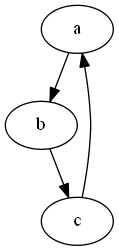

In [5]:
from IPython.display import display, Image
graph = pdp.graph_from_dot_data('digraph demo1{ a -> b -> c; c ->a; }')
display(Image(graph.create_png()))

### dot语法入门

#### 基本用法

- 使用双斜杠注释

```dot
// 这里是注释
```

- 指定有向图和无向图

```dot
// 有向图
digraph g {
    a->b;
    b->c;
    c->a;
}
```

```dot
// 无向图
graph g {
    a--b;
    b--c;
    c--a;
}
```

- 节点之间的关系使用`--`或者`->`表示节点间关系

- 定义属性使用`node[attribute1=value1, attribute2=value2]`

```dot
//定义a节点为长方形, 节点显示的文本为"Hello world"样式为填充, 填充颜色为#ABACBA
a[shape=box,label="Hello world",style=filled,fillcolor="#ABACBA"];
```

- 定义节点形状使用`node[shape=形状名称]`


使用上面提到的功能, 绘制下面的图:

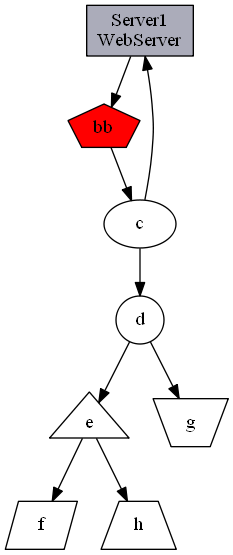

In [14]:
dot = '''
//定义节点属性
  digraph g {
      //==========定义节点关系============
      a->b;
      b->c;
      c->a;
      c->d->e->f;
      d->g;
      e->h;
      //==========定义节点属性============
      //定义a节点为长方形, 样式为填充, 填充颜色为#ABACBA
      a[shape=box,label="Server1\nWebServer",fillcolor="#ABACBA",style=filled];
      //定义b为5边形, 标签为"bb", 样式为填充, 填充色为red
      b[shape=polygon,sides=5,label="bb",style=filled,fillcolor=red];
      //c, 默认为椭圆
      d[shape=circle]; //园
      e[shape=triangle]; //三角形
      f[shape=polygon, sides=4, skew=0.5]; //平行四边形
      g[shape=polygon, distortion=0.5]; //梯形, 上边长
      h[shape=polygon, distortion=-.5]; //梯形, 下边长
  }
'''

graph = pdp.graph_from_dot_data(dot)
# 下面这行用于在notebook中显示图片
Image(graph.create_png())

#### 可用形状

下面是可以在shape属性中使用的:

<table align="CENTER">
  <tbody><tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/box.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/polygon.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/ellipse.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/oval.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:box">box</a>
    </td><td><a name="d:polygon">polygon</a>
    </td><td><a name="d:ellipse">ellipse</a>
    </td><td><a name="d:oval">oval</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/circle.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/point.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/egg.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/triangle.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:circle">circle</a>
    </td><td><a name="d:point">point</a>
    </td><td><a name="d:egg">egg</a>
    </td><td><a name="d:triangle">triangle</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/plaintext.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/plain.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/diamond.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/trapezium.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:plaintext">plaintext</a>
    </td><td><a name="d:plain">plain</a>
    </td><td><a name="d:diamond">diamond</a>
    </td><td><a name="d:trapezium">trapezium</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/parallelogram.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/house.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/pentagon.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/hexagon.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:parallelogram">parallelogram</a>
    </td><td><a name="d:house">house</a>
    </td><td><a name="d:pentagon">pentagon</a>
    </td><td><a name="d:hexagon">hexagon</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/septagon.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/octagon.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/doublecircle.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/doubleoctagon.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:septagon">septagon</a>
    </td><td><a name="d:octagon">octagon</a>
    </td><td><a name="d:doublecircle">doublecircle</a>
    </td><td><a name="d:doubleoctagon">doubleoctagon</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/tripleoctagon.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/invtriangle.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/invtrapezium.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/invhouse.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:tripleoctagon">tripleoctagon</a>
    </td><td><a name="d:invtriangle">invtriangle</a>
    </td><td><a name="d:invtrapezium">invtrapezium</a>
    </td><td><a name="d:invhouse">invhouse</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/Mdiamond.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/Msquare.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/Mcircle.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/rect.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:Mdiamond">Mdiamond</a>
    </td><td><a name="d:Msquare">Msquare</a>
    </td><td><a name="d:Mcircle">Mcircle</a>
    </td><td><a name="d:rect">rect</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/rectangle.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/square.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/star.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/none.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:rectangle">rectangle</a>
    </td><td><a name="d:square">square</a>
    </td><td><a name="d:star">star</a>
    </td><td><a name="d:none">none</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/underline.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/cylinder.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/note.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/tab.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:underline">underline</a>
    </td><td><a name="d:cylinder">cylinder</a>
    </td><td><a name="d:note">note</a>
    </td><td><a name="d:tab">tab</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/folder.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/box3d.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/component.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/promoter.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:folder">folder</a>
    </td><td><a name="d:box3d">box3d</a>
    </td><td><a name="d:component">component</a>
    </td><td><a name="d:promoter">promoter</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/cds.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/terminator.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/utr.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/primersite.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:cds">cds</a>
    </td><td><a name="d:terminator">terminator</a>
    </td><td><a name="d:utr">utr</a>
    </td><td><a name="d:primersite">primersite</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/restrictionsite.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/fivepoverhang.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/threepoverhang.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/noverhang.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:restrictionsite">restrictionsite</a>
    </td><td><a name="d:fivepoverhang">fivepoverhang</a>
    </td><td><a name="d:threepoverhang">threepoverhang</a>
    </td><td><a name="d:noverhang">noverhang</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/assembly.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/signature.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/insulator.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/ribosite.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:assembly">assembly</a>
    </td><td><a name="d:signature">signature</a>
    </td><td><a name="d:insulator">insulator</a>
    </td><td><a name="d:ribosite">ribosite</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/rnastab.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/proteasesite.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/proteinstab.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/rpromoter.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:rnastab">rnastab</a>
    </td><td><a name="d:proteasesite">proteasesite</a>
    </td><td><a name="d:proteinstab">proteinstab</a>
    </td><td><a name="d:rpromoter">rpromoter</a>
  </td></tr>
  <tr align="CENTER">
    <td><img src="https://graphviz.gitlab.io/_pages/doc/info/rarrow.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/larrow.gif">
    </td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/lpromoter.gif">
  </td></tr>
  <tr align="CENTER">
    <td><a name="d:rarrow">rarrow</a>
    </td><td><a name="d:larrow">larrow</a>
    </td><td><a name="d:lpromoter">lpromoter</a>
  </td></tr>
</tbody></table>

#### 可用颜色

下面是可以在属性color中使用的:

<table border="1" align="center">
<tbody><tr align="center">
<td bgcolor="#f0f8ff"><a title="#f0f8ff">aliceblue</a></td>
<td bgcolor="#faebd7"><a title="#faebd7">antiquewhite</a></td>
<td bgcolor="#ffefdb"><a title="#ffefdb">antiquewhite1</a></td>
<td bgcolor="#eedfcc"><a title="#eedfcc">antiquewhite2</a></td>
<td bgcolor="#cdc0b0"><a title="#cdc0b0">antiquewhite3</a></td>
</tr>
<tr align="center">
<td bgcolor="#8b8378"><a title="#8b8378">antiquewhite4</a></td>
<td bgcolor="#7fffd4"><a title="#7fffd4">aquamarine</a></td>
<td bgcolor="#7fffd4"><a title="#7fffd4">aquamarine1</a></td>
<td bgcolor="#76eec6"><a title="#76eec6">aquamarine2</a></td>
<td bgcolor="#66cdaa"><a title="#66cdaa">aquamarine3</a></td>
</tr>
<tr align="center">
<td bgcolor="#458b74"><a title="#458b74">aquamarine4</a></td>
<td bgcolor="#f0ffff"><a title="#f0ffff">azure</a></td>
<td bgcolor="#f0ffff"><a title="#f0ffff">azure1</a></td>
<td bgcolor="#e0eeee"><a title="#e0eeee">azure2</a></td>
<td bgcolor="#c1cdcd"><a title="#c1cdcd">azure3</a></td>
</tr>
<tr align="center">
<td bgcolor="#838b8b"><a title="#838b8b">azure4</a></td>
<td bgcolor="#f5f5dc"><a title="#f5f5dc">beige</a></td>
<td bgcolor="#ffe4c4"><a title="#ffe4c4">bisque</a></td>
<td bgcolor="#ffe4c4"><a title="#ffe4c4">bisque1</a></td>
<td bgcolor="#eed5b7"><a title="#eed5b7">bisque2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cdb79e"><a title="#cdb79e">bisque3</a></td>
<td bgcolor="#8b7d6b"><a title="#8b7d6b">bisque4</a></td>
<td bgcolor="#000000"><a title="#000000"><font color="white">black</font></a></td>
<td bgcolor="#ffebcd"><a title="#ffebcd">blanchedalmond</a></td>
<td bgcolor="#0000ff"><a title="#0000ff">&nbsp;&nbsp;&nbsp;blue&nbsp;&nbsp;&nbsp;</a></td>
</tr>
<tr align="center">
<td bgcolor="#0000ff"><a title="#0000ff">blue1</a></td>
<td bgcolor="#0000ee"><a title="#0000ee">blue2</a></td>
<td bgcolor="#0000cd"><a title="#0000cd">blue3</a></td>
<td bgcolor="#00008b"><a title="#00008b">blue4</a></td>
<td bgcolor="#8a2be2"><a title="#8a2be2">blueviolet</a></td>
</tr>
<tr align="center">
<td bgcolor="#a52a2a"><a title="#a52a2a">brown</a></td>
<td bgcolor="#ff4040"><a title="#ff4040">brown1</a></td>
<td bgcolor="#ee3b3b"><a title="#ee3b3b">brown2</a></td>
<td bgcolor="#cd3333"><a title="#cd3333">brown3</a></td>
<td bgcolor="#8b2323"><a title="#8b2323">brown4</a></td>
</tr>
<tr align="center">
<td bgcolor="#deb887"><a title="#deb887">burlywood</a></td>
<td bgcolor="#ffd39b"><a title="#ffd39b">burlywood1</a></td>
<td bgcolor="#eec591"><a title="#eec591">burlywood2</a></td>
<td bgcolor="#cdaa7d"><a title="#cdaa7d">burlywood3</a></td>
<td bgcolor="#8b7355"><a title="#8b7355">burlywood4</a></td>
</tr>
<tr align="center">
<td bgcolor="#5f9ea0"><a title="#5f9ea0">cadetblue</a></td>
<td bgcolor="#98f5ff"><a title="#98f5ff">cadetblue1</a></td>
<td bgcolor="#8ee5ee"><a title="#8ee5ee">cadetblue2</a></td>
<td bgcolor="#7ac5cd"><a title="#7ac5cd">cadetblue3</a></td>
<td bgcolor="#53868b"><a title="#53868b">cadetblue4</a></td>
</tr>
<tr align="center">
<td bgcolor="#7fff00"><a title="#7fff00">chartreuse</a></td>
<td bgcolor="#7fff00"><a title="#7fff00">chartreuse1</a></td>
<td bgcolor="#76ee00"><a title="#76ee00">chartreuse2</a></td>
<td bgcolor="#66cd00"><a title="#66cd00">chartreuse3</a></td>
<td bgcolor="#458b00"><a title="#458b00">chartreuse4</a></td>
</tr>
<tr align="center">
<td bgcolor="#d2691e"><a title="#d2691e">chocolate</a></td>
<td bgcolor="#ff7f24"><a title="#ff7f24">chocolate1</a></td>
<td bgcolor="#ee7621"><a title="#ee7621">chocolate2</a></td>
<td bgcolor="#cd661d"><a title="#cd661d">chocolate3</a></td>
<td bgcolor="#8b4513"><a title="#8b4513">chocolate4</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff7f50"><a title="#ff7f50">coral</a></td>
<td bgcolor="#ff7256"><a title="#ff7256">coral1</a></td>
<td bgcolor="#ee6a50"><a title="#ee6a50">coral2</a></td>
<td bgcolor="#cd5b45"><a title="#cd5b45">coral3</a></td>
<td bgcolor="#8b3e2f"><a title="#8b3e2f">coral4</a></td>
</tr>
<tr align="center">
<td bgcolor="#6495ed"><a title="#6495ed">cornflowerblue</a></td>
<td bgcolor="#fff8dc"><a title="#fff8dc">cornsilk</a></td>
<td bgcolor="#fff8dc"><a title="#fff8dc">cornsilk1</a></td>
<td bgcolor="#eee8cd"><a title="#eee8cd">cornsilk2</a></td>
<td bgcolor="#cdc8b1"><a title="#cdc8b1">cornsilk3</a></td>
</tr>
<tr align="center">
<td bgcolor="#8b8878"><a title="#8b8878">cornsilk4</a></td>
<td bgcolor="#dc143c"><a title="#dc143c">crimson</a></td>
<td bgcolor="#00ffff"><a title="#00ffff">&nbsp;&nbsp;&nbsp;cyan&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#00ffff"><a title="#00ffff">cyan1</a></td>
<td bgcolor="#00eeee"><a title="#00eeee">cyan2</a></td>
</tr>
<tr align="center">
<td bgcolor="#00cdcd"><a title="#00cdcd">cyan3</a></td>
<td bgcolor="#008b8b"><a title="#008b8b">cyan4</a></td>
<td bgcolor="#b8860b"><a title="#b8860b">darkgoldenrod</a></td>
<td bgcolor="#ffb90f"><a title="#ffb90f">darkgoldenrod1</a></td>
<td bgcolor="#eead0e"><a title="#eead0e">darkgoldenrod2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd950c"><a title="#cd950c">darkgoldenrod3</a></td>
<td bgcolor="#8b6508"><a title="#8b6508">darkgoldenrod4</a></td>
<td bgcolor="#006400"><a title="#006400"><font color="white">darkgreen</font></a></td>
<td bgcolor="#bdb76b"><a title="#bdb76b">darkkhaki</a></td>
<td bgcolor="#556b2f"><a title="#556b2f"><font color="white">darkolivegreen</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#caff70"><a title="#caff70">darkolivegreen1</a></td>
<td bgcolor="#bcee68"><a title="#bcee68">darkolivegreen2</a></td>
<td bgcolor="#a2cd5a"><a title="#a2cd5a">darkolivegreen3</a></td>
<td bgcolor="#6e8b3d"><a title="#6e8b3d">darkolivegreen4</a></td>
<td bgcolor="#ff8c00"><a title="#ff8c00">darkorange</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff7f00"><a title="#ff7f00">darkorange1</a></td>
<td bgcolor="#ee7600"><a title="#ee7600">darkorange2</a></td>
<td bgcolor="#cd6600"><a title="#cd6600">darkorange3</a></td>
<td bgcolor="#8b4500"><a title="#8b4500">darkorange4</a></td>
<td bgcolor="#9932cc"><a title="#9932cc">darkorchid</a></td>
</tr>
<tr align="center">
<td bgcolor="#bf3eff"><a title="#bf3eff">darkorchid1</a></td>
<td bgcolor="#b23aee"><a title="#b23aee">darkorchid2</a></td>
<td bgcolor="#9a32cd"><a title="#9a32cd">darkorchid3</a></td>
<td bgcolor="#68228b"><a title="#68228b">darkorchid4</a></td>
<td bgcolor="#e9967a"><a title="#e9967a">darksalmon</a></td>
</tr>
<tr align="center">
<td bgcolor="#8fbc8f"><a title="#8fbc8f">darkseagreen</a></td>
<td bgcolor="#c1ffc1"><a title="#c1ffc1">darkseagreen1</a></td>
<td bgcolor="#b4eeb4"><a title="#b4eeb4">darkseagreen2</a></td>
<td bgcolor="#9bcd9b"><a title="#9bcd9b">darkseagreen3</a></td>
<td bgcolor="#698b69"><a title="#698b69">darkseagreen4</a></td>
</tr>
<tr align="center">
<td bgcolor="#483d8b"><a title="#483d8b">darkslateblue</a></td>
<td bgcolor="#2f4f4f"><a title="#2f4f4f"><font color="white">darkslategray</font></a></td>
<td bgcolor="#97ffff"><a title="#97ffff">darkslategray1</a></td>
<td bgcolor="#8deeee"><a title="#8deeee">darkslategray2</a></td>
<td bgcolor="#79cdcd"><a title="#79cdcd">darkslategray3</a></td>
</tr>
<tr align="center">
<td bgcolor="#528b8b"><a title="#528b8b">darkslategray4</a></td>
<td bgcolor="#2f4f4f"><a title="#2f4f4f"><font color="white">darkslategrey</font></a></td>
<td bgcolor="#00ced1"><a title="#00ced1">darkturquoise</a></td>
<td bgcolor="#9400d3"><a title="#9400d3">darkviolet</a></td>
<td bgcolor="#ff1493"><a title="#ff1493">deeppink</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff1493"><a title="#ff1493">deeppink1</a></td>
<td bgcolor="#ee1289"><a title="#ee1289">deeppink2</a></td>
<td bgcolor="#cd1076"><a title="#cd1076">deeppink3</a></td>
<td bgcolor="#8b0a50"><a title="#8b0a50">deeppink4</a></td>
<td bgcolor="#00bfff"><a title="#00bfff">deepskyblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#00bfff"><a title="#00bfff">deepskyblue1</a></td>
<td bgcolor="#00b2ee"><a title="#00b2ee">deepskyblue2</a></td>
<td bgcolor="#009acd"><a title="#009acd">deepskyblue3</a></td>
<td bgcolor="#00688b"><a title="#00688b">deepskyblue4</a></td>
<td bgcolor="#696969"><a title="#696969"><font color="white">dimgray</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#696969"><a title="#696969"><font color="white">dimgrey</font></a></td>
<td bgcolor="#1e90ff"><a title="#1e90ff">dodgerblue</a></td>
<td bgcolor="#1e90ff"><a title="#1e90ff">dodgerblue1</a></td>
<td bgcolor="#1c86ee"><a title="#1c86ee">dodgerblue2</a></td>
<td bgcolor="#1874cd"><a title="#1874cd">dodgerblue3</a></td>
</tr>
<tr align="center">
<td bgcolor="#104e8b"><a title="#104e8b">dodgerblue4</a></td>
<td bgcolor="#b22222"><a title="#b22222">firebrick</a></td>
<td bgcolor="#ff3030"><a title="#ff3030">firebrick1</a></td>
<td bgcolor="#ee2c2c"><a title="#ee2c2c">firebrick2</a></td>
<td bgcolor="#cd2626"><a title="#cd2626">firebrick3</a></td>
</tr>
<tr align="center">
<td bgcolor="#8b1a1a"><a title="#8b1a1a">firebrick4</a></td>
<td bgcolor="#fffaf0"><a title="#fffaf0">floralwhite</a></td>
<td bgcolor="#228b22"><a title="#228b22">forestgreen</a></td>
<td bgcolor="#dcdcdc"><a title="#dcdcdc">gainsboro</a></td>
<td bgcolor="#f8f8ff"><a title="#f8f8ff">ghostwhite</a></td>
</tr>
<tr align="center">
<td bgcolor="#ffd700"><a title="#ffd700">&nbsp;&nbsp;&nbsp;gold&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ffd700"><a title="#ffd700">gold1</a></td>
<td bgcolor="#eec900"><a title="#eec900">gold2</a></td>
<td bgcolor="#cdad00"><a title="#cdad00">gold3</a></td>
<td bgcolor="#8b7500"><a title="#8b7500">gold4</a></td>
</tr>
<tr align="center">
<td bgcolor="#daa520"><a title="#daa520">goldenrod</a></td>
<td bgcolor="#ffc125"><a title="#ffc125">goldenrod1</a></td>
<td bgcolor="#eeb422"><a title="#eeb422">goldenrod2</a></td>
<td bgcolor="#cd9b1d"><a title="#cd9b1d">goldenrod3</a></td>
<td bgcolor="#8b6914"><a title="#8b6914">goldenrod4</a></td>
</tr>
<tr align="center">
<td bgcolor="#c0c0c0"><a title="#c0c0c0">&nbsp;&nbsp;&nbsp;gray&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#000000"><a title="#000000"><font color="white">gray0</font></a></td>
<td bgcolor="#030303"><a title="#030303"><font color="white">gray1</font></a></td>
<td bgcolor="#1a1a1a"><a title="#1a1a1a"><font color="white">gray10</font></a></td>
<td bgcolor="#ffffff"><a title="#ffffff">gray100</a></td>
</tr>
<tr align="center">
<td bgcolor="#1c1c1c"><a title="#1c1c1c"><font color="white">gray11</font></a></td>
<td bgcolor="#1f1f1f"><a title="#1f1f1f"><font color="white">gray12</font></a></td>
<td bgcolor="#212121"><a title="#212121"><font color="white">gray13</font></a></td>
<td bgcolor="#242424"><a title="#242424"><font color="white">gray14</font></a></td>
<td bgcolor="#262626"><a title="#262626"><font color="white">gray15</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#292929"><a title="#292929"><font color="white">gray16</font></a></td>
<td bgcolor="#2b2b2b"><a title="#2b2b2b"><font color="white">gray17</font></a></td>
<td bgcolor="#2e2e2e"><a title="#2e2e2e"><font color="white">gray18</font></a></td>
<td bgcolor="#303030"><a title="#303030"><font color="white">gray19</font></a></td>
<td bgcolor="#050505"><a title="#050505"><font color="white">gray2</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#333333"><a title="#333333"><font color="white">gray20</font></a></td>
<td bgcolor="#363636"><a title="#363636"><font color="white">gray21</font></a></td>
<td bgcolor="#383838"><a title="#383838"><font color="white">gray22</font></a></td>
<td bgcolor="#3b3b3b"><a title="#3b3b3b"><font color="white">gray23</font></a></td>
<td bgcolor="#3d3d3d"><a title="#3d3d3d"><font color="white">gray24</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#404040"><a title="#404040"><font color="white">gray25</font></a></td>
<td bgcolor="#424242"><a title="#424242"><font color="white">gray26</font></a></td>
<td bgcolor="#454545"><a title="#454545"><font color="white">gray27</font></a></td>
<td bgcolor="#474747"><a title="#474747"><font color="white">gray28</font></a></td>
<td bgcolor="#4a4a4a"><a title="#4a4a4a"><font color="white">gray29</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#080808"><a title="#080808"><font color="white">gray3</font></a></td>
<td bgcolor="#4d4d4d"><a title="#4d4d4d"><font color="white">gray30</font></a></td>
<td bgcolor="#4f4f4f"><a title="#4f4f4f"><font color="white">gray31</font></a></td>
<td bgcolor="#525252"><a title="#525252"><font color="white">gray32</font></a></td>
<td bgcolor="#545454"><a title="#545454"><font color="white">gray33</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#575757"><a title="#575757"><font color="white">gray34</font></a></td>
<td bgcolor="#595959"><a title="#595959"><font color="white">gray35</font></a></td>
<td bgcolor="#5c5c5c"><a title="#5c5c5c"><font color="white">gray36</font></a></td>
<td bgcolor="#5e5e5e"><a title="#5e5e5e"><font color="white">gray37</font></a></td>
<td bgcolor="#616161"><a title="#616161"><font color="white">gray38</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#636363"><a title="#636363"><font color="white">gray39</font></a></td>
<td bgcolor="#0a0a0a"><a title="#0a0a0a"><font color="white">gray4</font></a></td>
<td bgcolor="#666666"><a title="#666666"><font color="white">gray40</font></a></td>
<td bgcolor="#696969"><a title="#696969"><font color="white">gray41</font></a></td>
<td bgcolor="#6b6b6b"><a title="#6b6b6b"><font color="white">gray42</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#6e6e6e"><a title="#6e6e6e"><font color="white">gray43</font></a></td>
<td bgcolor="#707070"><a title="#707070"><font color="white">gray44</font></a></td>
<td bgcolor="#737373"><a title="#737373"><font color="white">gray45</font></a></td>
<td bgcolor="#757575"><a title="#757575"><font color="white">gray46</font></a></td>
<td bgcolor="#787878"><a title="#787878"><font color="white">gray47</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#7a7a7a"><a title="#7a7a7a"><font color="white">gray48</font></a></td>
<td bgcolor="#7d7d7d"><a title="#7d7d7d"><font color="white">gray49</font></a></td>
<td bgcolor="#0d0d0d"><a title="#0d0d0d"><font color="white">gray5</font></a></td>
<td bgcolor="#7f7f7f"><a title="#7f7f7f"><font color="white">gray50</font></a></td>
<td bgcolor="#828282"><a title="#828282"><font color="white">gray51</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#858585"><a title="#858585">gray52</a></td>
<td bgcolor="#878787"><a title="#878787">gray53</a></td>
<td bgcolor="#8a8a8a"><a title="#8a8a8a">gray54</a></td>
<td bgcolor="#8c8c8c"><a title="#8c8c8c">gray55</a></td>
<td bgcolor="#8f8f8f"><a title="#8f8f8f">gray56</a></td>
</tr>
<tr align="center">
<td bgcolor="#919191"><a title="#919191">gray57</a></td>
<td bgcolor="#949494"><a title="#949494">gray58</a></td>
<td bgcolor="#969696"><a title="#969696">gray59</a></td>
<td bgcolor="#0f0f0f"><a title="#0f0f0f"><font color="white">gray6</font></a></td>
<td bgcolor="#999999"><a title="#999999">gray60</a></td>
</tr>
<tr align="center">
<td bgcolor="#9c9c9c"><a title="#9c9c9c">gray61</a></td>
<td bgcolor="#9e9e9e"><a title="#9e9e9e">gray62</a></td>
<td bgcolor="#a1a1a1"><a title="#a1a1a1">gray63</a></td>
<td bgcolor="#a3a3a3"><a title="#a3a3a3">gray64</a></td>
<td bgcolor="#a6a6a6"><a title="#a6a6a6">gray65</a></td>
</tr>
<tr align="center">
<td bgcolor="#a8a8a8"><a title="#a8a8a8">gray66</a></td>
<td bgcolor="#ababab"><a title="#ababab">gray67</a></td>
<td bgcolor="#adadad"><a title="#adadad">gray68</a></td>
<td bgcolor="#b0b0b0"><a title="#b0b0b0">gray69</a></td>
<td bgcolor="#121212"><a title="#121212"><font color="white">gray7</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#b3b3b3"><a title="#b3b3b3">gray70</a></td>
<td bgcolor="#b5b5b5"><a title="#b5b5b5">gray71</a></td>
<td bgcolor="#b8b8b8"><a title="#b8b8b8">gray72</a></td>
<td bgcolor="#bababa"><a title="#bababa">gray73</a></td>
<td bgcolor="#bdbdbd"><a title="#bdbdbd">gray74</a></td>
</tr>
<tr align="center">
<td bgcolor="#bfbfbf"><a title="#bfbfbf">gray75</a></td>
<td bgcolor="#c2c2c2"><a title="#c2c2c2">gray76</a></td>
<td bgcolor="#c4c4c4"><a title="#c4c4c4">gray77</a></td>
<td bgcolor="#c7c7c7"><a title="#c7c7c7">gray78</a></td>
<td bgcolor="#c9c9c9"><a title="#c9c9c9">gray79</a></td>
</tr>
<tr align="center">
<td bgcolor="#141414"><a title="#141414"><font color="white">gray8</font></a></td>
<td bgcolor="#cccccc"><a title="#cccccc">gray80</a></td>
<td bgcolor="#cfcfcf"><a title="#cfcfcf">gray81</a></td>
<td bgcolor="#d1d1d1"><a title="#d1d1d1">gray82</a></td>
<td bgcolor="#d4d4d4"><a title="#d4d4d4">gray83</a></td>
</tr>
<tr align="center">
<td bgcolor="#d6d6d6"><a title="#d6d6d6">gray84</a></td>
<td bgcolor="#d9d9d9"><a title="#d9d9d9">gray85</a></td>
<td bgcolor="#dbdbdb"><a title="#dbdbdb">gray86</a></td>
<td bgcolor="#dedede"><a title="#dedede">gray87</a></td>
<td bgcolor="#e0e0e0"><a title="#e0e0e0">gray88</a></td>
</tr>
<tr align="center">
<td bgcolor="#e3e3e3"><a title="#e3e3e3">gray89</a></td>
<td bgcolor="#171717"><a title="#171717"><font color="white">gray9</font></a></td>
<td bgcolor="#e5e5e5"><a title="#e5e5e5">gray90</a></td>
<td bgcolor="#e8e8e8"><a title="#e8e8e8">gray91</a></td>
<td bgcolor="#ebebeb"><a title="#ebebeb">gray92</a></td>
</tr>
<tr align="center">
<td bgcolor="#ededed"><a title="#ededed">gray93</a></td>
<td bgcolor="#f0f0f0"><a title="#f0f0f0">gray94</a></td>
<td bgcolor="#f2f2f2"><a title="#f2f2f2">gray95</a></td>
<td bgcolor="#f5f5f5"><a title="#f5f5f5">gray96</a></td>
<td bgcolor="#f7f7f7"><a title="#f7f7f7">gray97</a></td>
</tr>
<tr align="center">
<td bgcolor="#fafafa"><a title="#fafafa">gray98</a></td>
<td bgcolor="#fcfcfc"><a title="#fcfcfc">gray99</a></td>
<td bgcolor="#00ff00"><a title="#00ff00">green</a></td>
<td bgcolor="#00ff00"><a title="#00ff00">green1</a></td>
<td bgcolor="#00ee00"><a title="#00ee00">green2</a></td>
</tr>
<tr align="center">
<td bgcolor="#00cd00"><a title="#00cd00">green3</a></td>
<td bgcolor="#008b00"><a title="#008b00">green4</a></td>
<td bgcolor="#adff2f"><a title="#adff2f">greenyellow</a></td>
<td bgcolor="#c0c0c0"><a title="#c0c0c0">&nbsp;&nbsp;&nbsp;grey&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#000000"><a title="#000000"><font color="white">grey0</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#030303"><a title="#030303"><font color="white">grey1</font></a></td>
<td bgcolor="#1a1a1a"><a title="#1a1a1a"><font color="white">grey10</font></a></td>
<td bgcolor="#ffffff"><a title="#ffffff">grey100</a></td>
<td bgcolor="#1c1c1c"><a title="#1c1c1c"><font color="white">grey11</font></a></td>
<td bgcolor="#1f1f1f"><a title="#1f1f1f"><font color="white">grey12</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#212121"><a title="#212121"><font color="white">grey13</font></a></td>
<td bgcolor="#242424"><a title="#242424"><font color="white">grey14</font></a></td>
<td bgcolor="#262626"><a title="#262626"><font color="white">grey15</font></a></td>
<td bgcolor="#292929"><a title="#292929"><font color="white">grey16</font></a></td>
<td bgcolor="#2b2b2b"><a title="#2b2b2b"><font color="white">grey17</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#2e2e2e"><a title="#2e2e2e"><font color="white">grey18</font></a></td>
<td bgcolor="#303030"><a title="#303030"><font color="white">grey19</font></a></td>
<td bgcolor="#050505"><a title="#050505"><font color="white">grey2</font></a></td>
<td bgcolor="#333333"><a title="#333333"><font color="white">grey20</font></a></td>
<td bgcolor="#363636"><a title="#363636"><font color="white">grey21</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#383838"><a title="#383838"><font color="white">grey22</font></a></td>
<td bgcolor="#3b3b3b"><a title="#3b3b3b"><font color="white">grey23</font></a></td>
<td bgcolor="#3d3d3d"><a title="#3d3d3d"><font color="white">grey24</font></a></td>
<td bgcolor="#404040"><a title="#404040"><font color="white">grey25</font></a></td>
<td bgcolor="#424242"><a title="#424242"><font color="white">grey26</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#454545"><a title="#454545"><font color="white">grey27</font></a></td>
<td bgcolor="#474747"><a title="#474747"><font color="white">grey28</font></a></td>
<td bgcolor="#4a4a4a"><a title="#4a4a4a"><font color="white">grey29</font></a></td>
<td bgcolor="#080808"><a title="#080808"><font color="white">grey3</font></a></td>
<td bgcolor="#4d4d4d"><a title="#4d4d4d"><font color="white">grey30</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#4f4f4f"><a title="#4f4f4f"><font color="white">grey31</font></a></td>
<td bgcolor="#525252"><a title="#525252"><font color="white">grey32</font></a></td>
<td bgcolor="#545454"><a title="#545454"><font color="white">grey33</font></a></td>
<td bgcolor="#575757"><a title="#575757"><font color="white">grey34</font></a></td>
<td bgcolor="#595959"><a title="#595959"><font color="white">grey35</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#5c5c5c"><a title="#5c5c5c"><font color="white">grey36</font></a></td>
<td bgcolor="#5e5e5e"><a title="#5e5e5e"><font color="white">grey37</font></a></td>
<td bgcolor="#616161"><a title="#616161"><font color="white">grey38</font></a></td>
<td bgcolor="#636363"><a title="#636363"><font color="white">grey39</font></a></td>
<td bgcolor="#0a0a0a"><a title="#0a0a0a"><font color="white">grey4</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#666666"><a title="#666666"><font color="white">grey40</font></a></td>
<td bgcolor="#696969"><a title="#696969"><font color="white">grey41</font></a></td>
<td bgcolor="#6b6b6b"><a title="#6b6b6b"><font color="white">grey42</font></a></td>
<td bgcolor="#6e6e6e"><a title="#6e6e6e"><font color="white">grey43</font></a></td>
<td bgcolor="#707070"><a title="#707070"><font color="white">grey44</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#737373"><a title="#737373"><font color="white">grey45</font></a></td>
<td bgcolor="#757575"><a title="#757575"><font color="white">grey46</font></a></td>
<td bgcolor="#787878"><a title="#787878"><font color="white">grey47</font></a></td>
<td bgcolor="#7a7a7a"><a title="#7a7a7a"><font color="white">grey48</font></a></td>
<td bgcolor="#7d7d7d"><a title="#7d7d7d"><font color="white">grey49</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#0d0d0d"><a title="#0d0d0d"><font color="white">grey5</font></a></td>
<td bgcolor="#7f7f7f"><a title="#7f7f7f"><font color="white">grey50</font></a></td>
<td bgcolor="#828282"><a title="#828282"><font color="white">grey51</font></a></td>
<td bgcolor="#858585"><a title="#858585">grey52</a></td>
<td bgcolor="#878787"><a title="#878787">grey53</a></td>
</tr>
<tr align="center">
<td bgcolor="#8a8a8a"><a title="#8a8a8a">grey54</a></td>
<td bgcolor="#8c8c8c"><a title="#8c8c8c">grey55</a></td>
<td bgcolor="#8f8f8f"><a title="#8f8f8f">grey56</a></td>
<td bgcolor="#919191"><a title="#919191">grey57</a></td>
<td bgcolor="#949494"><a title="#949494">grey58</a></td>
</tr>
<tr align="center">
<td bgcolor="#969696"><a title="#969696">grey59</a></td>
<td bgcolor="#0f0f0f"><a title="#0f0f0f"><font color="white">grey6</font></a></td>
<td bgcolor="#999999"><a title="#999999">grey60</a></td>
<td bgcolor="#9c9c9c"><a title="#9c9c9c">grey61</a></td>
<td bgcolor="#9e9e9e"><a title="#9e9e9e">grey62</a></td>
</tr>
<tr align="center">
<td bgcolor="#a1a1a1"><a title="#a1a1a1">grey63</a></td>
<td bgcolor="#a3a3a3"><a title="#a3a3a3">grey64</a></td>
<td bgcolor="#a6a6a6"><a title="#a6a6a6">grey65</a></td>
<td bgcolor="#a8a8a8"><a title="#a8a8a8">grey66</a></td>
<td bgcolor="#ababab"><a title="#ababab">grey67</a></td>
</tr>
<tr align="center">
<td bgcolor="#adadad"><a title="#adadad">grey68</a></td>
<td bgcolor="#b0b0b0"><a title="#b0b0b0">grey69</a></td>
<td bgcolor="#121212"><a title="#121212"><font color="white">grey7</font></a></td>
<td bgcolor="#b3b3b3"><a title="#b3b3b3">grey70</a></td>
<td bgcolor="#b5b5b5"><a title="#b5b5b5">grey71</a></td>
</tr>
<tr align="center">
<td bgcolor="#b8b8b8"><a title="#b8b8b8">grey72</a></td>
<td bgcolor="#bababa"><a title="#bababa">grey73</a></td>
<td bgcolor="#bdbdbd"><a title="#bdbdbd">grey74</a></td>
<td bgcolor="#bfbfbf"><a title="#bfbfbf">grey75</a></td>
<td bgcolor="#c2c2c2"><a title="#c2c2c2">grey76</a></td>
</tr>
<tr align="center">
<td bgcolor="#c4c4c4"><a title="#c4c4c4">grey77</a></td>
<td bgcolor="#c7c7c7"><a title="#c7c7c7">grey78</a></td>
<td bgcolor="#c9c9c9"><a title="#c9c9c9">grey79</a></td>
<td bgcolor="#141414"><a title="#141414"><font color="white">grey8</font></a></td>
<td bgcolor="#cccccc"><a title="#cccccc">grey80</a></td>
</tr>
<tr align="center">
<td bgcolor="#cfcfcf"><a title="#cfcfcf">grey81</a></td>
<td bgcolor="#d1d1d1"><a title="#d1d1d1">grey82</a></td>
<td bgcolor="#d4d4d4"><a title="#d4d4d4">grey83</a></td>
<td bgcolor="#d6d6d6"><a title="#d6d6d6">grey84</a></td>
<td bgcolor="#d9d9d9"><a title="#d9d9d9">grey85</a></td>
</tr>
<tr align="center">
<td bgcolor="#dbdbdb"><a title="#dbdbdb">grey86</a></td>
<td bgcolor="#dedede"><a title="#dedede">grey87</a></td>
<td bgcolor="#e0e0e0"><a title="#e0e0e0">grey88</a></td>
<td bgcolor="#e3e3e3"><a title="#e3e3e3">grey89</a></td>
<td bgcolor="#171717"><a title="#171717"><font color="white">grey9</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#e5e5e5"><a title="#e5e5e5">grey90</a></td>
<td bgcolor="#e8e8e8"><a title="#e8e8e8">grey91</a></td>
<td bgcolor="#ebebeb"><a title="#ebebeb">grey92</a></td>
<td bgcolor="#ededed"><a title="#ededed">grey93</a></td>
<td bgcolor="#f0f0f0"><a title="#f0f0f0">grey94</a></td>
</tr>
<tr align="center">
<td bgcolor="#f2f2f2"><a title="#f2f2f2">grey95</a></td>
<td bgcolor="#f5f5f5"><a title="#f5f5f5">grey96</a></td>
<td bgcolor="#f7f7f7"><a title="#f7f7f7">grey97</a></td>
<td bgcolor="#fafafa"><a title="#fafafa">grey98</a></td>
<td bgcolor="#fcfcfc"><a title="#fcfcfc">grey99</a></td>
</tr>
<tr align="center">
<td bgcolor="#f0fff0"><a title="#f0fff0">honeydew</a></td>
<td bgcolor="#f0fff0"><a title="#f0fff0">honeydew1</a></td>
<td bgcolor="#e0eee0"><a title="#e0eee0">honeydew2</a></td>
<td bgcolor="#c1cdc1"><a title="#c1cdc1">honeydew3</a></td>
<td bgcolor="#838b83"><a title="#838b83">honeydew4</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff69b4"><a title="#ff69b4">hotpink</a></td>
<td bgcolor="#ff6eb4"><a title="#ff6eb4">hotpink1</a></td>
<td bgcolor="#ee6aa7"><a title="#ee6aa7">hotpink2</a></td>
<td bgcolor="#cd6090"><a title="#cd6090">hotpink3</a></td>
<td bgcolor="#8b3a62"><a title="#8b3a62">hotpink4</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd5c5c"><a title="#cd5c5c">indianred</a></td>
<td bgcolor="#ff6a6a"><a title="#ff6a6a">indianred1</a></td>
<td bgcolor="#ee6363"><a title="#ee6363">indianred2</a></td>
<td bgcolor="#cd5555"><a title="#cd5555">indianred3</a></td>
<td bgcolor="#8b3a3a"><a title="#8b3a3a">indianred4</a></td>
</tr>
<tr align="center">
<td bgcolor="#4b0082"><a title="#4b0082"><font color="white">indigo</font></a></td>
<td bgcolor="#fffffe"><a title="#fffffe">invis</a></td>
<td bgcolor="#fffff0"><a title="#fffff0">ivory</a></td>
<td bgcolor="#fffff0"><a title="#fffff0">ivory1</a></td>
<td bgcolor="#eeeee0"><a title="#eeeee0">ivory2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cdcdc1"><a title="#cdcdc1">ivory3</a></td>
<td bgcolor="#8b8b83"><a title="#8b8b83">ivory4</a></td>
<td bgcolor="#f0e68c"><a title="#f0e68c">khaki</a></td>
<td bgcolor="#fff68f"><a title="#fff68f">khaki1</a></td>
<td bgcolor="#eee685"><a title="#eee685">khaki2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cdc673"><a title="#cdc673">khaki3</a></td>
<td bgcolor="#8b864e"><a title="#8b864e">khaki4</a></td>
<td bgcolor="#e6e6fa"><a title="#e6e6fa">lavender</a></td>
<td bgcolor="#fff0f5"><a title="#fff0f5">lavenderblush</a></td>
<td bgcolor="#fff0f5"><a title="#fff0f5">lavenderblush1</a></td>
</tr>
<tr align="center">
<td bgcolor="#eee0e5"><a title="#eee0e5">lavenderblush2</a></td>
<td bgcolor="#cdc1c5"><a title="#cdc1c5">lavenderblush3</a></td>
<td bgcolor="#8b8386"><a title="#8b8386">lavenderblush4</a></td>
<td bgcolor="#7cfc00"><a title="#7cfc00">lawngreen</a></td>
<td bgcolor="#fffacd"><a title="#fffacd">lemonchiffon</a></td>
</tr>
<tr align="center">
<td bgcolor="#fffacd"><a title="#fffacd">lemonchiffon1</a></td>
<td bgcolor="#eee9bf"><a title="#eee9bf">lemonchiffon2</a></td>
<td bgcolor="#cdc9a5"><a title="#cdc9a5">lemonchiffon3</a></td>
<td bgcolor="#8b8970"><a title="#8b8970">lemonchiffon4</a></td>
<td bgcolor="#add8e6"><a title="#add8e6">lightblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#bfefff"><a title="#bfefff">lightblue1</a></td>
<td bgcolor="#b2dfee"><a title="#b2dfee">lightblue2</a></td>
<td bgcolor="#9ac0cd"><a title="#9ac0cd">lightblue3</a></td>
<td bgcolor="#68838b"><a title="#68838b">lightblue4</a></td>
<td bgcolor="#f08080"><a title="#f08080">lightcoral</a></td>
</tr>
<tr align="center">
<td bgcolor="#e0ffff"><a title="#e0ffff">lightcyan</a></td>
<td bgcolor="#e0ffff"><a title="#e0ffff">lightcyan1</a></td>
<td bgcolor="#d1eeee"><a title="#d1eeee">lightcyan2</a></td>
<td bgcolor="#b4cdcd"><a title="#b4cdcd">lightcyan3</a></td>
<td bgcolor="#7a8b8b"><a title="#7a8b8b">lightcyan4</a></td>
</tr>
<tr align="center">
<td bgcolor="#eedd82"><a title="#eedd82">lightgoldenrod</a></td>
<td bgcolor="#ffec8b"><a title="#ffec8b">lightgoldenrod1</a></td>
<td bgcolor="#eedc82"><a title="#eedc82">lightgoldenrod2</a></td>
<td bgcolor="#cdbe70"><a title="#cdbe70">lightgoldenrod3</a></td>
<td bgcolor="#8b814c"><a title="#8b814c">lightgoldenrod4</a></td>
</tr>
<tr align="center">
<td bgcolor="#fafad2"><a title="#fafad2">lightgoldenrodyellow</a></td>
<td bgcolor="#d3d3d3"><a title="#d3d3d3">lightgray</a></td>
<td bgcolor="#d3d3d3"><a title="#d3d3d3">lightgrey</a></td>
<td bgcolor="#ffb6c1"><a title="#ffb6c1">lightpink</a></td>
<td bgcolor="#ffaeb9"><a title="#ffaeb9">lightpink1</a></td>
</tr>
<tr align="center">
<td bgcolor="#eea2ad"><a title="#eea2ad">lightpink2</a></td>
<td bgcolor="#cd8c95"><a title="#cd8c95">lightpink3</a></td>
<td bgcolor="#8b5f65"><a title="#8b5f65">lightpink4</a></td>
<td bgcolor="#ffa07a"><a title="#ffa07a">lightsalmon</a></td>
<td bgcolor="#ffa07a"><a title="#ffa07a">lightsalmon1</a></td>
</tr>
<tr align="center">
<td bgcolor="#ee9572"><a title="#ee9572">lightsalmon2</a></td>
<td bgcolor="#cd8162"><a title="#cd8162">lightsalmon3</a></td>
<td bgcolor="#8b5742"><a title="#8b5742">lightsalmon4</a></td>
<td bgcolor="#20b2aa"><a title="#20b2aa">lightseagreen</a></td>
<td bgcolor="#87cefa"><a title="#87cefa">lightskyblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#b0e2ff"><a title="#b0e2ff">lightskyblue1</a></td>
<td bgcolor="#a4d3ee"><a title="#a4d3ee">lightskyblue2</a></td>
<td bgcolor="#8db6cd"><a title="#8db6cd">lightskyblue3</a></td>
<td bgcolor="#607b8b"><a title="#607b8b">lightskyblue4</a></td>
<td bgcolor="#8470ff"><a title="#8470ff">lightslateblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#778899"><a title="#778899">lightslategray</a></td>
<td bgcolor="#778899"><a title="#778899">lightslategrey</a></td>
<td bgcolor="#b0c4de"><a title="#b0c4de">lightsteelblue</a></td>
<td bgcolor="#cae1ff"><a title="#cae1ff">lightsteelblue1</a></td>
<td bgcolor="#bcd2ee"><a title="#bcd2ee">lightsteelblue2</a></td>
</tr>
<tr align="center">
<td bgcolor="#a2b5cd"><a title="#a2b5cd">lightsteelblue3</a></td>
<td bgcolor="#6e7b8b"><a title="#6e7b8b">lightsteelblue4</a></td>
<td bgcolor="#ffffe0"><a title="#ffffe0">lightyellow</a></td>
<td bgcolor="#ffffe0"><a title="#ffffe0">lightyellow1</a></td>
<td bgcolor="#eeeed1"><a title="#eeeed1">lightyellow2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cdcdb4"><a title="#cdcdb4">lightyellow3</a></td>
<td bgcolor="#8b8b7a"><a title="#8b8b7a">lightyellow4</a></td>
<td bgcolor="#32cd32"><a title="#32cd32">limegreen</a></td>
<td bgcolor="#faf0e6"><a title="#faf0e6">linen</a></td>
<td bgcolor="#ff00ff"><a title="#ff00ff">magenta</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff00ff"><a title="#ff00ff">magenta1</a></td>
<td bgcolor="#ee00ee"><a title="#ee00ee">magenta2</a></td>
<td bgcolor="#cd00cd"><a title="#cd00cd">magenta3</a></td>
<td bgcolor="#8b008b"><a title="#8b008b">magenta4</a></td>
<td bgcolor="#b03060"><a title="#b03060">maroon</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff34b3"><a title="#ff34b3">maroon1</a></td>
<td bgcolor="#ee30a7"><a title="#ee30a7">maroon2</a></td>
<td bgcolor="#cd2990"><a title="#cd2990">maroon3</a></td>
<td bgcolor="#8b1c62"><a title="#8b1c62">maroon4</a></td>
<td bgcolor="#66cdaa"><a title="#66cdaa">mediumaquamarine</a></td>
</tr>
<tr align="center">
<td bgcolor="#0000cd"><a title="#0000cd">mediumblue</a></td>
<td bgcolor="#ba55d3"><a title="#ba55d3">mediumorchid</a></td>
<td bgcolor="#e066ff"><a title="#e066ff">mediumorchid1</a></td>
<td bgcolor="#d15fee"><a title="#d15fee">mediumorchid2</a></td>
<td bgcolor="#b452cd"><a title="#b452cd">mediumorchid3</a></td>
</tr>
<tr align="center">
<td bgcolor="#7a378b"><a title="#7a378b">mediumorchid4</a></td>
<td bgcolor="#9370db"><a title="#9370db">mediumpurple</a></td>
<td bgcolor="#ab82ff"><a title="#ab82ff">mediumpurple1</a></td>
<td bgcolor="#9f79ee"><a title="#9f79ee">mediumpurple2</a></td>
<td bgcolor="#8968cd"><a title="#8968cd">mediumpurple3</a></td>
</tr>
<tr align="center">
<td bgcolor="#5d478b"><a title="#5d478b">mediumpurple4</a></td>
<td bgcolor="#3cb371"><a title="#3cb371">mediumseagreen</a></td>
<td bgcolor="#7b68ee"><a title="#7b68ee">mediumslateblue</a></td>
<td bgcolor="#00fa9a"><a title="#00fa9a">mediumspringgreen</a></td>
<td bgcolor="#48d1cc"><a title="#48d1cc">mediumturquoise</a></td>
</tr>
<tr align="center">
<td bgcolor="#c71585"><a title="#c71585">mediumvioletred</a></td>
<td bgcolor="#191970"><a title="#191970"><font color="white">midnightblue</font></a></td>
<td bgcolor="#f5fffa"><a title="#f5fffa">mintcream</a></td>
<td bgcolor="#ffe4e1"><a title="#ffe4e1">mistyrose</a></td>
<td bgcolor="#ffe4e1"><a title="#ffe4e1">mistyrose1</a></td>
</tr>
<tr align="center">
<td bgcolor="#eed5d2"><a title="#eed5d2">mistyrose2</a></td>
<td bgcolor="#cdb7b5"><a title="#cdb7b5">mistyrose3</a></td>
<td bgcolor="#8b7d7b"><a title="#8b7d7b">mistyrose4</a></td>
<td bgcolor="#ffe4b5"><a title="#ffe4b5">moccasin</a></td>
<td bgcolor="#ffdead"><a title="#ffdead">navajowhite</a></td>
</tr>
<tr align="center">
<td bgcolor="#ffdead"><a title="#ffdead">navajowhite1</a></td>
<td bgcolor="#eecfa1"><a title="#eecfa1">navajowhite2</a></td>
<td bgcolor="#cdb38b"><a title="#cdb38b">navajowhite3</a></td>
<td bgcolor="#8b795e"><a title="#8b795e">navajowhite4</a></td>
<td bgcolor="#000080"><a title="#000080"><font color="white">&nbsp;&nbsp;&nbsp;navy&nbsp;&nbsp;&nbsp;</font></a></td>
</tr>
<tr align="center">
<td bgcolor="#000080"><a title="#000080"><font color="white">navyblue</font></a></td>
<td bgcolor="#fffffe"><a title="#fffffe">&nbsp;&nbsp;&nbsp;none&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#fdf5e6"><a title="#fdf5e6">oldlace</a></td>
<td bgcolor="#6b8e23"><a title="#6b8e23">olivedrab</a></td>
<td bgcolor="#c0ff3e"><a title="#c0ff3e">olivedrab1</a></td>
</tr>
<tr align="center">
<td bgcolor="#b3ee3a"><a title="#b3ee3a">olivedrab2</a></td>
<td bgcolor="#9acd32"><a title="#9acd32">olivedrab3</a></td>
<td bgcolor="#698b22"><a title="#698b22">olivedrab4</a></td>
<td bgcolor="#ffa500"><a title="#ffa500">orange</a></td>
<td bgcolor="#ffa500"><a title="#ffa500">orange1</a></td>
</tr>
<tr align="center">
<td bgcolor="#ee9a00"><a title="#ee9a00">orange2</a></td>
<td bgcolor="#cd8500"><a title="#cd8500">orange3</a></td>
<td bgcolor="#8b5a00"><a title="#8b5a00">orange4</a></td>
<td bgcolor="#ff4500"><a title="#ff4500">orangered</a></td>
<td bgcolor="#ff4500"><a title="#ff4500">orangered1</a></td>
</tr>
<tr align="center">
<td bgcolor="#ee4000"><a title="#ee4000">orangered2</a></td>
<td bgcolor="#cd3700"><a title="#cd3700">orangered3</a></td>
<td bgcolor="#8b2500"><a title="#8b2500">orangered4</a></td>
<td bgcolor="#da70d6"><a title="#da70d6">orchid</a></td>
<td bgcolor="#ff83fa"><a title="#ff83fa">orchid1</a></td>
</tr>
<tr align="center">
<td bgcolor="#ee7ae9"><a title="#ee7ae9">orchid2</a></td>
<td bgcolor="#cd69c9"><a title="#cd69c9">orchid3</a></td>
<td bgcolor="#8b4789"><a title="#8b4789">orchid4</a></td>
<td bgcolor="#eee8aa"><a title="#eee8aa">palegoldenrod</a></td>
<td bgcolor="#98fb98"><a title="#98fb98">palegreen</a></td>
</tr>
<tr align="center">
<td bgcolor="#9aff9a"><a title="#9aff9a">palegreen1</a></td>
<td bgcolor="#90ee90"><a title="#90ee90">palegreen2</a></td>
<td bgcolor="#7ccd7c"><a title="#7ccd7c">palegreen3</a></td>
<td bgcolor="#548b54"><a title="#548b54">palegreen4</a></td>
<td bgcolor="#afeeee"><a title="#afeeee">paleturquoise</a></td>
</tr>
<tr align="center">
<td bgcolor="#bbffff"><a title="#bbffff">paleturquoise1</a></td>
<td bgcolor="#aeeeee"><a title="#aeeeee">paleturquoise2</a></td>
<td bgcolor="#96cdcd"><a title="#96cdcd">paleturquoise3</a></td>
<td bgcolor="#668b8b"><a title="#668b8b">paleturquoise4</a></td>
<td bgcolor="#db7093"><a title="#db7093">palevioletred</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff82ab"><a title="#ff82ab">palevioletred1</a></td>
<td bgcolor="#ee799f"><a title="#ee799f">palevioletred2</a></td>
<td bgcolor="#cd6889"><a title="#cd6889">palevioletred3</a></td>
<td bgcolor="#8b475d"><a title="#8b475d">palevioletred4</a></td>
<td bgcolor="#ffefd5"><a title="#ffefd5">papayawhip</a></td>
</tr>
<tr align="center">
<td bgcolor="#ffdab9"><a title="#ffdab9">peachpuff</a></td>
<td bgcolor="#ffdab9"><a title="#ffdab9">peachpuff1</a></td>
<td bgcolor="#eecbad"><a title="#eecbad">peachpuff2</a></td>
<td bgcolor="#cdaf95"><a title="#cdaf95">peachpuff3</a></td>
<td bgcolor="#8b7765"><a title="#8b7765">peachpuff4</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd853f"><a title="#cd853f">&nbsp;&nbsp;&nbsp;peru&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ffc0cb"><a title="#ffc0cb">&nbsp;&nbsp;&nbsp;pink&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ffb5c5"><a title="#ffb5c5">pink1</a></td>
<td bgcolor="#eea9b8"><a title="#eea9b8">pink2</a></td>
<td bgcolor="#cd919e"><a title="#cd919e">pink3</a></td>
</tr>
<tr align="center">
<td bgcolor="#8b636c"><a title="#8b636c">pink4</a></td>
<td bgcolor="#dda0dd"><a title="#dda0dd">&nbsp;&nbsp;&nbsp;plum&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ffbbff"><a title="#ffbbff">plum1</a></td>
<td bgcolor="#eeaeee"><a title="#eeaeee">plum2</a></td>
<td bgcolor="#cd96cd"><a title="#cd96cd">plum3</a></td>
</tr>
<tr align="center">
<td bgcolor="#8b668b"><a title="#8b668b">plum4</a></td>
<td bgcolor="#b0e0e6"><a title="#b0e0e6">powderblue</a></td>
<td bgcolor="#a020f0"><a title="#a020f0">purple</a></td>
<td bgcolor="#9b30ff"><a title="#9b30ff">purple1</a></td>
<td bgcolor="#912cee"><a title="#912cee">purple2</a></td>
</tr>
<tr align="center">
<td bgcolor="#7d26cd"><a title="#7d26cd">purple3</a></td>
<td bgcolor="#551a8b"><a title="#551a8b">purple4</a></td>
<td bgcolor="#ff0000"><a title="#ff0000">&nbsp;&nbsp;&nbsp;red&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ff0000"><a title="#ff0000">&nbsp;&nbsp;&nbsp;red1&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ee0000"><a title="#ee0000">&nbsp;&nbsp;&nbsp;red2&nbsp;&nbsp;&nbsp;</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd0000"><a title="#cd0000">&nbsp;&nbsp;&nbsp;red3&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#8b0000"><a title="#8b0000">&nbsp;&nbsp;&nbsp;red4&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#bc8f8f"><a title="#bc8f8f">rosybrown</a></td>
<td bgcolor="#ffc1c1"><a title="#ffc1c1">rosybrown1</a></td>
<td bgcolor="#eeb4b4"><a title="#eeb4b4">rosybrown2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd9b9b"><a title="#cd9b9b">rosybrown3</a></td>
<td bgcolor="#8b6969"><a title="#8b6969">rosybrown4</a></td>
<td bgcolor="#4169e1"><a title="#4169e1">royalblue</a></td>
<td bgcolor="#4876ff"><a title="#4876ff">royalblue1</a></td>
<td bgcolor="#436eee"><a title="#436eee">royalblue2</a></td>
</tr>
<tr align="center">
<td bgcolor="#3a5fcd"><a title="#3a5fcd">royalblue3</a></td>
<td bgcolor="#27408b"><a title="#27408b">royalblue4</a></td>
<td bgcolor="#8b4513"><a title="#8b4513">saddlebrown</a></td>
<td bgcolor="#fa8072"><a title="#fa8072">salmon</a></td>
<td bgcolor="#ff8c69"><a title="#ff8c69">salmon1</a></td>
</tr>
<tr align="center">
<td bgcolor="#ee8262"><a title="#ee8262">salmon2</a></td>
<td bgcolor="#cd7054"><a title="#cd7054">salmon3</a></td>
<td bgcolor="#8b4c39"><a title="#8b4c39">salmon4</a></td>
<td bgcolor="#f4a460"><a title="#f4a460">sandybrown</a></td>
<td bgcolor="#2e8b57"><a title="#2e8b57">seagreen</a></td>
</tr>
<tr align="center">
<td bgcolor="#54ff9f"><a title="#54ff9f">seagreen1</a></td>
<td bgcolor="#4eee94"><a title="#4eee94">seagreen2</a></td>
<td bgcolor="#43cd80"><a title="#43cd80">seagreen3</a></td>
<td bgcolor="#2e8b57"><a title="#2e8b57">seagreen4</a></td>
<td bgcolor="#fff5ee"><a title="#fff5ee">seashell</a></td>
</tr>
<tr align="center">
<td bgcolor="#fff5ee"><a title="#fff5ee">seashell1</a></td>
<td bgcolor="#eee5de"><a title="#eee5de">seashell2</a></td>
<td bgcolor="#cdc5bf"><a title="#cdc5bf">seashell3</a></td>
<td bgcolor="#8b8682"><a title="#8b8682">seashell4</a></td>
<td bgcolor="#a0522d"><a title="#a0522d">sienna</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff8247"><a title="#ff8247">sienna1</a></td>
<td bgcolor="#ee7942"><a title="#ee7942">sienna2</a></td>
<td bgcolor="#cd6839"><a title="#cd6839">sienna3</a></td>
<td bgcolor="#8b4726"><a title="#8b4726">sienna4</a></td>
<td bgcolor="#87ceeb"><a title="#87ceeb">skyblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#87ceff"><a title="#87ceff">skyblue1</a></td>
<td bgcolor="#7ec0ee"><a title="#7ec0ee">skyblue2</a></td>
<td bgcolor="#6ca6cd"><a title="#6ca6cd">skyblue3</a></td>
<td bgcolor="#4a708b"><a title="#4a708b">skyblue4</a></td>
<td bgcolor="#6a5acd"><a title="#6a5acd">slateblue</a></td>
</tr>
<tr align="center">
<td bgcolor="#836fff"><a title="#836fff">slateblue1</a></td>
<td bgcolor="#7a67ee"><a title="#7a67ee">slateblue2</a></td>
<td bgcolor="#6959cd"><a title="#6959cd">slateblue3</a></td>
<td bgcolor="#473c8b"><a title="#473c8b">slateblue4</a></td>
<td bgcolor="#708090"><a title="#708090">slategray</a></td>
</tr>
<tr align="center">
<td bgcolor="#c6e2ff"><a title="#c6e2ff">slategray1</a></td>
<td bgcolor="#b9d3ee"><a title="#b9d3ee">slategray2</a></td>
<td bgcolor="#9fb6cd"><a title="#9fb6cd">slategray3</a></td>
<td bgcolor="#6c7b8b"><a title="#6c7b8b">slategray4</a></td>
<td bgcolor="#708090"><a title="#708090">slategrey</a></td>
</tr>
<tr align="center">
<td bgcolor="#fffafa"><a title="#fffafa">&nbsp;&nbsp;&nbsp;snow&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#fffafa"><a title="#fffafa">snow1</a></td>
<td bgcolor="#eee9e9"><a title="#eee9e9">snow2</a></td>
<td bgcolor="#cdc9c9"><a title="#cdc9c9">snow3</a></td>
<td bgcolor="#8b8989"><a title="#8b8989">snow4</a></td>
</tr>
<tr align="center">
<td bgcolor="#00ff7f"><a title="#00ff7f">springgreen</a></td>
<td bgcolor="#00ff7f"><a title="#00ff7f">springgreen1</a></td>
<td bgcolor="#00ee76"><a title="#00ee76">springgreen2</a></td>
<td bgcolor="#00cd66"><a title="#00cd66">springgreen3</a></td>
<td bgcolor="#008b45"><a title="#008b45">springgreen4</a></td>
</tr>
<tr align="center">
<td bgcolor="#4682b4"><a title="#4682b4">steelblue</a></td>
<td bgcolor="#63b8ff"><a title="#63b8ff">steelblue1</a></td>
<td bgcolor="#5cacee"><a title="#5cacee">steelblue2</a></td>
<td bgcolor="#4f94cd"><a title="#4f94cd">steelblue3</a></td>
<td bgcolor="#36648b"><a title="#36648b">steelblue4</a></td>
</tr>
<tr align="center">
<td bgcolor="#d2b48c"><a title="#d2b48c">&nbsp;&nbsp;&nbsp;tan&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ffa54f"><a title="#ffa54f">&nbsp;&nbsp;&nbsp;tan1&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#ee9a49"><a title="#ee9a49">&nbsp;&nbsp;&nbsp;tan2&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#cd853f"><a title="#cd853f">&nbsp;&nbsp;&nbsp;tan3&nbsp;&nbsp;&nbsp;</a></td>
<td bgcolor="#8b5a2b"><a title="#8b5a2b">&nbsp;&nbsp;&nbsp;tan4&nbsp;&nbsp;&nbsp;</a></td>
</tr>
<tr align="center">
<td bgcolor="#d8bfd8"><a title="#d8bfd8">thistle</a></td>
<td bgcolor="#ffe1ff"><a title="#ffe1ff">thistle1</a></td>
<td bgcolor="#eed2ee"><a title="#eed2ee">thistle2</a></td>
<td bgcolor="#cdb5cd"><a title="#cdb5cd">thistle3</a></td>
<td bgcolor="#8b7b8b"><a title="#8b7b8b">thistle4</a></td>
</tr>
<tr align="center">
<td bgcolor="#ff6347"><a title="#ff6347">tomato</a></td>
<td bgcolor="#ff6347"><a title="#ff6347">tomato1</a></td>
<td bgcolor="#ee5c42"><a title="#ee5c42">tomato2</a></td>
<td bgcolor="#cd4f39"><a title="#cd4f39">tomato3</a></td>
<td bgcolor="#8b3626"><a title="#8b3626">tomato4</a></td>
</tr>
<tr align="center">
<td bgcolor="#fffffe"><a title="#fffffe">transparent</a></td>
<td bgcolor="#40e0d0"><a title="#40e0d0">turquoise</a></td>
<td bgcolor="#00f5ff"><a title="#00f5ff">turquoise1</a></td>
<td bgcolor="#00e5ee"><a title="#00e5ee">turquoise2</a></td>
<td bgcolor="#00c5cd"><a title="#00c5cd">turquoise3</a></td>
</tr>
<tr align="center">
<td bgcolor="#00868b"><a title="#00868b">turquoise4</a></td>
<td bgcolor="#ee82ee"><a title="#ee82ee">violet</a></td>
<td bgcolor="#d02090"><a title="#d02090">violetred</a></td>
<td bgcolor="#ff3e96"><a title="#ff3e96">violetred1</a></td>
<td bgcolor="#ee3a8c"><a title="#ee3a8c">violetred2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cd3278"><a title="#cd3278">violetred3</a></td>
<td bgcolor="#8b2252"><a title="#8b2252">violetred4</a></td>
<td bgcolor="#f5deb3"><a title="#f5deb3">wheat</a></td>
<td bgcolor="#ffe7ba"><a title="#ffe7ba">wheat1</a></td>
<td bgcolor="#eed8ae"><a title="#eed8ae">wheat2</a></td>
</tr>
<tr align="center">
<td bgcolor="#cdba96"><a title="#cdba96">wheat3</a></td>
<td bgcolor="#8b7e66"><a title="#8b7e66">wheat4</a></td>
<td bgcolor="#ffffff"><a title="#ffffff">white</a></td>
<td bgcolor="#f5f5f5"><a title="#f5f5f5">whitesmoke</a></td>
<td bgcolor="#ffff00"><a title="#ffff00">yellow</a></td>
</tr>
<tr align="center">
<td bgcolor="#ffff00"><a title="#ffff00">yellow1</a></td>
<td bgcolor="#eeee00"><a title="#eeee00">yellow2</a></td>
<td bgcolor="#cdcd00"><a title="#cdcd00">yellow3</a></td>
<td bgcolor="#8b8b00"><a title="#8b8b00">yellow4</a></td>
<td bgcolor="#9acd32"><a title="#9acd32">yellowgreen</a></td>
</tr>
</tbody></table>

#### 箭头类型

通常可以这样指定箭头形状: `[arrowhead=dot]`

<table>
  <tbody><tr>
    <td>"box"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_box.gif">
    </td><td>"crow"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_crow.gif">
    </td><td>"curve"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_curve.gif">
    </td><td>"diamond"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_diamond.gif">
  </td></tr>
  <tr>
  </tr>
  <tr>
    <td>"dot"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_dot.gif">
    </td><td>"icurve"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_icurve.gif">
    </td><td>"inv"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_inv.gif">
    </td><td>"none"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_none.gif">
  </td></tr>
  <tr>
  </tr>
  <tr>
    <td>"normal"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_normal.gif">
    </td><td>"tee"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_tee.gif">
    </td><td>"vee"</td><td><img src="https://graphviz.gitlab.io/_pages/doc/info/a_open.gif">
  </td></tr>
</tbody></table>

下面是一个案例:

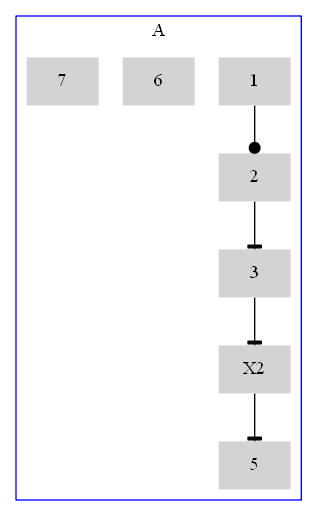

In [18]:
dot = '''
digraph graphname {
    subgraph clusterA {
        node [shape=plaintext,style=filled];
        1 -> 2 [arrowhead=dot];
        2 -> 3 -> X2 -> 5[arrowhead=tee];
        6;
        7;
        label = "A";
        color=blue
    }
}
'''
graph = pdp.graph_from_dot_data(dot)
# 下面这行用于在notebook中显示图片
Image(graph.create_png())

### 终极案例-绘制决策树

使用pydotplus可以很方便的绘制决策树的决策图, 下面直接上代码就可以了:

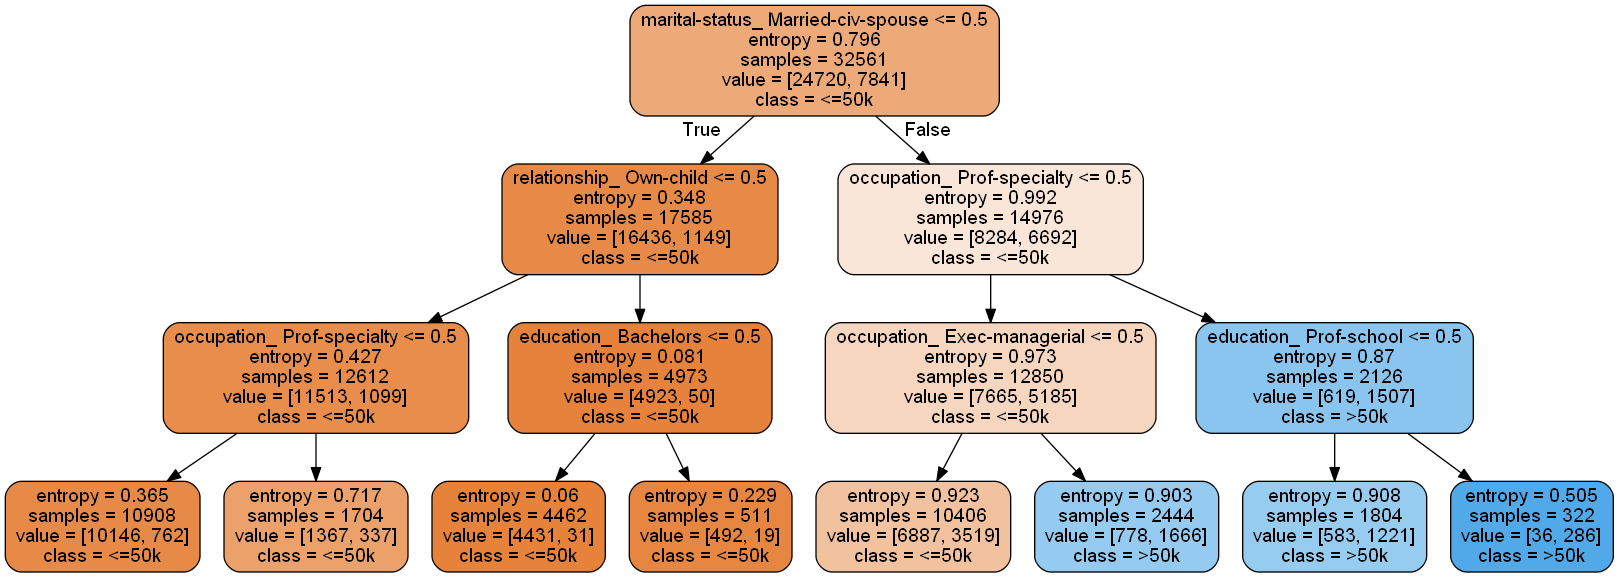

In [12]:
#用于数据处理和分析的工具包
import pandas as pd
#引入用于数据预处理/特征工程的工具包
from sklearn import preprocessing
#import决策树建模包
from sklearn import tree
from IPython.display import display, Image
adult_data = pd.read_csv('DecisionTree.csv')
feature_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']
features = adult_data[feature_columns]
label = adult_data[label_column]
features = pd.get_dummies(features)
#初始化一个决策树分类器
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
#用决策树分类器拟合数据
clf = clf.fit(features.values, label.values)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=features.columns,
                                class_names = ['<=50k', '>50k'],
                                filled = True,
                                rounded =True
                               )
graph = pdp.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))